In [2]:
import numpy as np
from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras import models, layers, activations
from tensorflow.keras.layers import Conv2D, TimeDistributed, BatchNormalization, MaxPooling2D, Flatten, Bidirectional, Dense,Dropout,Flatten
from tensorflow.keras.applications import VGG16
from tensorflow.keras.callbacks import EarlyStopping

In [3]:
x_data = np.load('lip/lip_x_data.npy') # x_save.npy
y_data = np.load('lip/lip_y_data.npy') # y_data.npy
y_data = keras.utils.to_categorical(y_data,11)
print(x_data.shape, y_data.shape)

(3000, 27, 64, 64, 3) (3000, 11)


In [4]:
X_train, X_test, Y_train, Y_test = train_test_split(x_data, y_data, test_size = 0.2, shuffle = True, stratify=y_data)
print("x_train: {}, X_test: {}".format(X_train.shape, X_test.shape))
print("Y_train: {}, Y_test: {}".format(Y_train.shape, Y_test.shape))

x_train: (2400, 27, 64, 64, 3), X_test: (600, 27, 64, 64, 3)
Y_train: (2400, 11), Y_test: (600, 11)


In [5]:
from tensorflow.keras.applications.mobilenet import MobileNet
from tensorflow.keras.layers import Input


# this could also be the output a different Keras model or layer
#input_tensor = Input(shape=(224, 224, 3))

#model = InceptionV3(input_tensor=input_tensor, weights='imagenet', include_top=True)

class MobileNet_LSTM(keras.Model):
    def __init__(self, num_classes):
        super(MobileNet_LSTM, self).__init__()
        #self.BZ = input_shape[0]
        #self.frame = input_shape[1]

        self.mobile = TimeDistributed(MobileNet(weights='imagenet', include_top=False))
        #self.vgg.trainable = False

        self.bilstm = layers.Bidirectional(layers.LSTM(256), merge_mode='concat')
        self.dense = layers.Dense(num_classes, activation='softmax')
        self.max = TimeDistributed(MaxPooling2D(pool_size=(2, 2)))
        self.dropout = layers.Dropout(0.2)
        self.flat= TimeDistributed(Flatten())

    def call(self, x):
        x = self.mobile(x)
        x = self.max(x)
        x = self.dropout(x)      
        x = self.flat(x)
        x = self.dropout(x)
        x = self.bilstm(x)
        return self.dense(x)

In [6]:
model = MobileNet_LSTM(num_classes = 11)
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [7]:
model.load_weights("mobileNet_lip") 
print("Loaded model from disk")


Two checkpoint references resolved to different objects (<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x000002719D1EDBB0> and <tensorflow.python.keras.layers.convolutional.ZeroPadding2D object at 0x000002719D1ED3D0>).

Two checkpoint references resolved to different objects (<tensorflow.python.keras.layers.normalization_v2.BatchNormalization object at 0x000002719D1ED5B0> and <tensorflow.python.keras.layers.convolutional.Conv2D object at 0x000002719D1EDBB0>).

Two checkpoint references resolved to different objects (<tensorflow.python.keras.layers.convolutional.DepthwiseConv2D object at 0x000002719D366400> and <tensorflow.python.keras.layers.advanced_activations.ReLU object at 0x000002719D205250>).

Two checkpoint references resolved to different objects (<tensorflow.python.keras.layers.normalization_v2.BatchNormalization object at 0x000002719D370C70> and <tensorflow.python.keras.layers.convolutional.DepthwiseConv2D object at 0x000002719D366400>).

Two checkpoint refe


Two checkpoint references resolved to different objects (<tensorflow.python.keras.layers.normalization_v2.BatchNormalization object at 0x000002719D528310> and <tensorflow.python.keras.layers.convolutional.Conv2D object at 0x000002719D512790>).

Two checkpoint references resolved to different objects (<tensorflow.python.keras.layers.convolutional.DepthwiseConv2D object at 0x000002719D549460> and <tensorflow.python.keras.layers.advanced_activations.ReLU object at 0x000002719D544DC0>).

Two checkpoint references resolved to different objects (<tensorflow.python.keras.layers.normalization_v2.BatchNormalization object at 0x000002719D576F10> and <tensorflow.python.keras.layers.convolutional.DepthwiseConv2D object at 0x000002719D549460>).

Two checkpoint references resolved to different objects (<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x000002719D57DCA0> and <tensorflow.python.keras.layers.advanced_activations.ReLU object at 0x000002719D57D1F0>).

Two checkpoint refere


Two checkpoint references resolved to different objects (<tensorflow.python.keras.layers.convolutional.DepthwiseConv2D object at 0x000002719D6F2430> and <tensorflow.python.keras.layers.advanced_activations.ReLU object at 0x000002719D6F2580>).

Two checkpoint references resolved to different objects (<tensorflow.python.keras.layers.normalization_v2.BatchNormalization object at 0x000002719D7164F0> and <tensorflow.python.keras.layers.convolutional.DepthwiseConv2D object at 0x000002719D6F2430>).

Two checkpoint references resolved to different objects (<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x000002719D7296D0> and <tensorflow.python.keras.layers.advanced_activations.ReLU object at 0x000002719D701130>).

Two checkpoint references resolved to different objects (<tensorflow.python.keras.layers.normalization_v2.BatchNormalization object at 0x000002719D737880> and <tensorflow.python.keras.layers.convolutional.Conv2D object at 0x000002719D7296D0>).

Two checkpoint refere


Two checkpoint references resolved to different objects (<tensorflow.python.keras.layers.normalization_v2.BatchNormalization object at 0x000002719D89F1C0> and <tensorflow.python.keras.layers.convolutional.DepthwiseConv2D object at 0x000002719D89F310>).

Two checkpoint references resolved to different objects (<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x000002719DA023A0> and <tensorflow.python.keras.layers.advanced_activations.ReLU object at 0x000002719DA02A00>).

Two checkpoint references resolved to different objects (<tensorflow.python.keras.layers.normalization_v2.BatchNormalization object at 0x000002719DA172B0> and <tensorflow.python.keras.layers.convolutional.Conv2D object at 0x000002719DA023A0>).
Loaded model from disk


In [8]:
print(X_test.shape, Y_test.shape)

(600, 27, 64, 64, 3) (600, 11)


In [9]:
#score = model.evaluate(X_test, Y_test, batch_size = 32, verbose = 1)

In [10]:
# a1,a2,a3,a4, a5, a6, a7, a8, a9, a10 = [], [], [],[],[],[],[],[],[],[]
# for i in range(len(Y_test)):
#     y = np.argmax(Y_test[i])
#     if y == 1:
#         a1.append(i)
#     elif y==2:
#         a2.append(i)
#     elif y== 3:
#         a3.append(i)
#     elif y==4:
#         a4.append(i)
#     elif y==5:
#         a5.append(i)
#     elif y== 6:
#         a6.append(i)
#     elif y==7:
#         a7.append(i)
#     elif y==8:
#         a8.append(i)
#     elif y==9:
#         a9.append(i)
#     elif y==10:
#         a10.append(i)

## 600개의 X_test에 대한 결과 분석

#### 각 결과에 대한 정답 비율

In [11]:
# Y_test의 index 1~10 까지 60개씩 존재 : 총 600개
predictions = model.predict(X_test)

In [12]:
#정답 비율 확인
answer = []
no_answer =[]

for i in range(600):
    true_label  = np.argmax(Y_test[i])
    predictions_array  = np.argmax(predictions[i])  
    if true_label == predictions_array:
        answer.append(true_label)
    else:
        no_answer.append(true_label)

In [13]:
print(len(answer), len(no_answer)) # 76, 524

552 48


In [14]:
per = []
for i in range(1, 11):
    per.append(answer.count(i)/60)

In [15]:
class_words = ['Begin', 'Choose','Connection', 'Navigation', 'Next','Previous','Start', 'Stop', 'Hello', 'Web']
class_sen = ['Stop navigation', 'Excuse me.', 'I am sorry.', 'Thank you.', 'Good bye.', 'I love this game.', 'Nice to meet you.', 'You are welcome.', 'How are you?', 'Have a good time.']

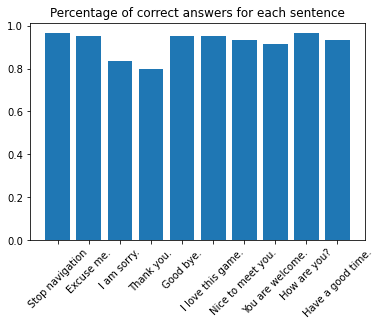

In [16]:
import matplotlib.pyplot as plt
import numpy as np

plt.title('Percentage of correct answers for each sentence')

y = np.arange(10)
plt.bar(y, per)
plt.xticks(y, class_sen, rotation = 45)
plt.show()
#plt.bar(y, per, align='edge', color="skyblue", edgecolor="black", linewidth=3, tick_label=y, log=False)
#plt.show()

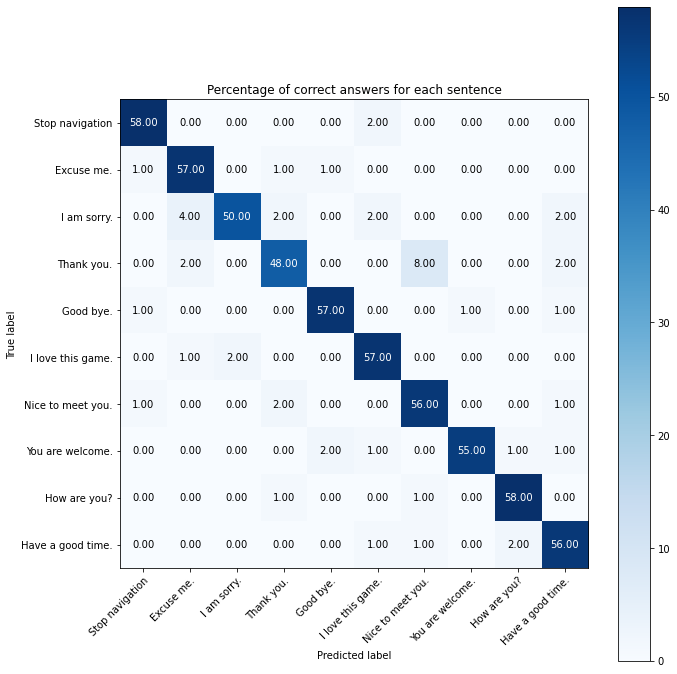

In [17]:
from sklearn.metrics import confusion_matrix
cm= confusion_matrix(np.argmax(Y_test, axis=1),np.argmax(predictions, axis=1))
fig, ax = plt.subplots(figsize = (10, 10))
im = ax.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
ax.figure.colorbar(im, ax=ax)
ax.set(xticks=np.arange(cm.shape[1]), yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=class_sen, yticklabels=class_sen, title='Percentage of correct answers for each sentence',
           ylabel='True label', xlabel='Predicted label')
plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")
fmt = '.2f' 
thresh = cm.max() / 2.
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(j, i, format(cm[i, j], fmt), fontsize = 10,ha="center", va="center", color="white" if cm[i, j] > thresh else "black")
fig.tight_layout()

In [18]:
predictions[0] # 첫번째 예측 (10개의 숫자배열)

array([8.9963430e-07, 2.7242128e-04, 7.0647836e-02, 2.1426266e-03,
       6.0913253e-01, 2.1670118e-04, 5.2681244e-03, 3.0913952e-01,
       1.8262552e-06, 8.8243285e-04, 2.2951432e-03], dtype=float32)

In [19]:
np.argmax(predictions[0]) # 가장 높은 신뢰도를 가진 레이블 (10)

4

In [20]:
predictions[599]

array([2.8726459e-08, 1.7875159e-07, 3.1360396e-05, 9.3869940e-06,
       7.4710607e-07, 4.2930522e-05, 6.4284022e-06, 3.0544680e-04,
       6.8709898e-07, 5.2064177e-05, 9.9955076e-01], dtype=float32)

In [ ]:
# i = 0
# predictions_array, true_label = predictions[i], Y_test[i]
# true_label = np.argmax(true_label)
# predicted_label = np.argmax(predictions_array)
# if predicted_label == true_label:
#     color = 'blue'
# else:
#     color = 'red'

# #print("{} {:2.0f}% ({})".format(class_sen[predicted_label], 100*np.max(predictions_array), class_sen[true_label]), color=color)
# print("{} {:2.0f}% ({})".format(class_sen[predicted_label], 100*np.max(predictions_array), class_sen[true_label]))